In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image

# Introduction


League of Legends (LoL) is a multiplayer online battle arena (MOBA) video game developed and published by Riot Games. 
It is a team-based game where two teams of five players each compete against each other on a map called the "Summoner's Rift". The game has a large player base and is played competitively in various leagues and tournaments around the world.
In League of Legends, players take on the role of a "champion", each with unique abilities and playstyles. 
Players start the game at level 1 and earn experience points and gold by killing minions, neutral monsters, and other player's champions. As they level up, they gain access to more powerful abilities and items, allowing them to deal more damage. A team wins when they destroy the enemies nexus. There are several factors that can influence which team wins a match in League of Legends. Some of the key factors are:

Overall, League of Legends is a fast-paced and complex game that requires strategy, teamwork, and skill to master. 
It has a large and active player base, and is played competitively at both the amateur and professional levels.
Players can be of many different tiers, divisions and points.The purpose of this analysis is to draw conclusions about the which
factors lead to a win. it is being determine which factors can lead to a win. Work can be done to ensure data is normal, champion playrate and winrate is balanced.

Using the sql_csv function in RiotAPI, 2 csv files are created from the SQL database and are then read into here.
query1 = SELECT * from participant
query2 = SELECT * from items

In [43]:
df = pd.read_csv("all_participants.csv")
df_item = pd.read_csv("items.csv")
df_champion = pd.read_csv("champions.csv")

# Dataset analysis 

In [44]:
df.head()

,match_id,assist,champion_level,champion_id,champion_name,dmg_to_turrets,deaths,first_blood,first_tower,gold_spend,...,kills,participant_id,sumoner_level,id,team_position,total_damage,total_damage_taken,minions_killed,turret_kills,win
0,NA1_4550653187,6,17,38,Kassadin,3429,4,0,0,10200,...,5,8,197,5gQo4rcWWhWdBsxLvYRgB8nBL9oQbALQHt1yJYisGgx4Snc,MIDDLE,17669,30284,214,1,0
1,NA1_4550653187,4,14,39,Irelia,850,13,0,0,11750,...,6,6,186,pe41sQPT1h2-rQtdLrygLXWTbjA0XiaHYUmstYAGWaBrrto,TOP,17879,30276,179,0,0
2,NA1_4550653187,10,14,50,Swain,1715,4,1,0,8910,...,6,5,236,OJscDqpF1msFjCrJfpkq03ovjbPYgsCjl_jq5nJAQYjYG6k,UTILITY,11243,23678,36,5,1
3,NA1_4550653187,7,16,60,Elise,3742,4,0,0,14025,...,16,2,365,cgwNuXJ2DfefEbUB0SPc68IBwea2bgKKFxXucuDRCsQ3Afg,JUNGLE,39146,31681,22,3,1
4,NA1_4550653187,14,16,61,Orianna,1531,4,0,0,8600,...,2,3,295,TsPId7SJwX2xTQQnKldv5zZaBKe8XUmDYg-PCqst9nwIJwc,MIDDLE,11054,15609,178,6,1


There are several factors that can contribute to a win such as

Team composition: The composition of a team can play a big role in determining their chances of winning. A well-balanced team that has a good mix of tanks, damage dealers, and support champions can have an advantage over a team with a weaker composition.

Player skill: The skill level of the players on a team is also an important factor. Players who have a better understanding of the game mechanics and are able to coordinate their actions with their teammates can often outplay their opponents.

Kills and deaths: Gold and experience: When a player gets a kill, they are rewarded with gold and experience points. Gold can be used to purchase items that can make the player stronger and more effective in combat, while experience points help the player level up and gain new abilities. While dead, a player can not gain experience or gold and the team loses map control. Number advantages can help control parts of the map. For example, if a team kills an opponent in the bot lane, they can push the wave and take the dragon objective, giving more stats. Getting the first kill in a match provides 400gold as opposed to 300 gold

Objectives control: The ability to control objectives such as towers, dragon, and Baron Nashor can give a significant advantage to the team that secures them. Objectives provide valuable resources and can allow teams to push their advantage or come back from a deficit. Towers can provide a safe area to a team as they will target and do major damage to the enemy. Destroying towers gives gold to all members of a team. Destroyng the first tower provides more gold as well.

Luck and chance: Like any competitive game, luck and chance can also play a role in determining the outcome of a match. Random events such as critical hits, unexpected ganks, and lucky escapes can sometimes turn the tide of a game. 

# Data cleanup

In [45]:
df.shape

(10000, 34)

The dataset contains 10000 rows and 34 columns. The dataset information depends on the SQL database as well as the query used to
retrieve the information.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   match_id            10000 non-null  object
 1   assist              10000 non-null  int64 
 2   champion_level      10000 non-null  int64 
 3   champion_id         10000 non-null  int64 
 4   champion_name       10000 non-null  object
 5   dmg_to_turrets      10000 non-null  int64 
 6   deaths              10000 non-null  int64 
 7   first_blood         10000 non-null  int64 
 8   first_tower         10000 non-null  int64 
 9   gold_spend          10000 non-null  int64 
 10  item0               10000 non-null  int64 
 11  item1               10000 non-null  int64 
 12  item2               10000 non-null  int64 
 13  item3               10000 non-null  int64 
 14  item4               10000 non-null  int64 
 15  item5               10000 non-null  int64 
 16  item6               100

Most columns have no null values. 10000/10000 rows are non-null for every column except team position. Which is missing over 1611 values. This is due to Riot's API match data being unable to determine what role a participant was doing in the match. As there can be different positions for every champiion and playstyle. In the all_participant data frame, there is a variety of columns having types of either integer64 or object(strings).



### Removing all rows that have Nan values for every column. 

In this dataset, there are none but there may be some for other queries. 

In [47]:
#Drops all values with all columns na value
df_no_nan = df[df.isna().any(axis=1)]
df_no_nan = df_no_nan.dropna(how='all')

### Adding side column indicating whether a participant was on the red side or the blue side. All participants on the same side and same match are on the same team.

In [48]:
#Participants with an id of 1-5 are on the blue side and 6-10 are on the red side
df['side'] = pd.Series('blue', index=df.index).mask(df['participant_id']>5,'red')
df = df.sort_values('match_id')
df

,match_id,assist,champion_level,champion_id,champion_name,dmg_to_turrets,deaths,first_blood,first_tower,gold_spend,...,participant_id,sumoner_level,id,team_position,total_damage,total_damage_taken,minions_killed,turret_kills,win,side
0,NA1_4550653187,6,17,38,Kassadin,3429,4,0,0,10200,...,8,197,5gQo4rcWWhWdBsxLvYRgB8nBL9oQbALQHt1yJYisGgx4Snc,MIDDLE,17669,30284,214,1,0,red
1,NA1_4550653187,4,14,39,Irelia,850,13,0,0,11750,...,6,186,pe41sQPT1h2-rQtdLrygLXWTbjA0XiaHYUmstYAGWaBrrto,TOP,17879,30276,179,0,0,red
2,NA1_4550653187,10,14,50,Swain,1715,4,1,0,8910,...,5,236,OJscDqpF1msFjCrJfpkq03ovjbPYgsCjl_jq5nJAQYjYG6k,UTILITY,11243,23678,36,5,1,blue
3,NA1_4550653187,7,16,60,Elise,3742,4,0,0,14025,...,2,365,cgwNuXJ2DfefEbUB0SPc68IBwea2bgKKFxXucuDRCsQ3Afg,JUNGLE,39146,31681,22,3,1,blue
4,NA1_4550653187,14,16,61,Orianna,1531,4,0,0,8600,...,3,295,TsPId7SJwX2xTQQnKldv5zZaBKe8XUmDYg-PCqst9nwIJwc,MIDDLE,11054,15609,178,6,1,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,NA1_4595695911,17,17,145,Kaisa,7873,7,0,0,17105,...,9,671,0SuBi0nYCrLBSSj9G97aLvlgnXL4Nnhm47ma-N4iS708E_Q,BOTTOM,43749,25056,186,6,1,red
9995,NA1_4595695911,8,14,234,Viego,585,10,0,0,11025,...,2,437,ka9NPLnngLm4Si5Jzg8PMdR9wtixU7vNaKK7eg68-YF6wdM,JUNGLE,18259,39529,15,0,0,blue
9996,NA1_4595695911,16,12,412,Thresh,809,13,0,0,7825,...,5,893,sySlO3p52xL3Ks_AgJrljgr2avu3NDKuf5DzfFFGOXpynYA,UTILITY,7650,29225,33,2,0,blue
9997,NA1_4595695911,7,16,517,Sylas,1439,10,0,0,14125,...,3,315,hgXwGw5D9ZIRN2__uL2505skxxfq9jtGQou0EEP_BXetHmU,MIDDLE,29502,45043,197,1,0,blue


### Adding champion winrate column

In a match, a champion can only be played once between both teams. Since in every match there is a winner and loser, the average of all champions win rate is 0.5 and the expected win rate of a champion is 0.5

In [49]:
#Groups all integer values together by champions Since win has a value of 1 and a lose at a value of 0
#The total amount of wins is the sum of all values in the win column
df_winrate = df.groupby(['champion_name']).sum().sort_values('champion_name')
#adds a new column in df_winrate that groups data by champion and counts the total amount of rows, then returns only the win co
#The total amount of games a champion used is the count of all times the champion appears regardless of win.
df_winrate['total_games'] = df.groupby(['champion_name']).count().sort_values('champion_name')['win']
df_winrate['champion_winrate'] = df_winrate['win']/df_winrate['total_games']
df_winrate['champion_name'] = df_winrate.index.tolist()
df_winrate.reset_index(drop=True,inplace=True)
df = df.merge(df_winrate[['champion_name','champion_winrate']], on='champion_name').sort_values(['match_id','participant_id'])
df

,match_id,assist,champion_level,champion_id,champion_name,dmg_to_turrets,deaths,first_blood,first_tower,gold_spend,...,sumoner_level,id,team_position,total_damage,total_damage_taken,minions_killed,turret_kills,win,side,champion_winrate
420,NA1_4550653187,11,17,114,Fiora,6816,6,0,1,14600,...,589,_gWH-KQwT9CBDMmE00XaPuF0-2TmPRDEu9Ew8EA1kKA45bg,TOP,27943,35235,210,4,1,blue,0.505882
183,NA1_4550653187,7,16,60,Elise,3742,4,0,0,14025,...,365,cgwNuXJ2DfefEbUB0SPc68IBwea2bgKKFxXucuDRCsQ3Afg,JUNGLE,39146,31681,22,3,1,blue,0.509434
236,NA1_4550653187,14,16,61,Orianna,1531,4,0,0,8600,...,295,TsPId7SJwX2xTQQnKldv5zZaBKe8XUmDYg-PCqst9nwIJwc,MIDDLE,11054,15609,178,6,1,blue,0.606557
297,NA1_4550653187,13,15,67,Vayne,10751,8,0,0,12950,...,297,le81GuZYvf6wLqIsT251Xa46voE0gmjhGhN1d0BYTaGSnjY,BOTTOM,27752,28558,178,7,1,blue,0.344828
113,NA1_4550653187,10,14,50,Swain,1715,4,1,0,8910,...,236,OJscDqpF1msFjCrJfpkq03ovjbPYgsCjl_jq5nJAQYjYG6k,UTILITY,11243,23678,36,5,1,blue,0.442857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6180,NA1_4595695911,10,17,24,Jax,9014,11,0,0,14300,...,113,JK7ua-IgEFt6D1xs_8_WQXxXdS4_ErcSoZSpx4LJT4zTbB...,TOP,33210,29552,206,3,1,red,0.570175
5053,NA1_4595695911,18,17,56,Nocturne,5544,4,0,0,11850,...,224,mFjXx9o2AyKyqR844SbnQMAW6FZfleEb487wUYHZuqLPOX...,JUNGLE,19095,34513,41,6,1,red,0.600000
5368,NA1_4595695911,18,18,136,AurelionSol,1392,7,1,0,14950,...,443,Rwc52Ma0aUp44E_g00MNtzEATz9H-yyhx6gKTRsKLqU98uM,MIDDLE,34507,20772,248,3,1,red,0.588652
1588,NA1_4595695911,17,17,145,Kaisa,7873,7,0,0,17105,...,671,0SuBi0nYCrLBSSj9G97aLvlgnXL4Nnhm47ma-N4iS708E_Q,BOTTOM,43749,25056,186,6,1,red,0.463855


### DIsplaying all champions winrate

In [50]:
lowest = df_winrate.loc[df_winrate["champion_winrate"] == df_winrate["champion_winrate"].min()]
highest = df_winrate.loc[df_winrate["champion_winrate"] == df_winrate["champion_winrate"].max()]
lowest_name = lowest.iloc[0]['champion_name']
highest_name =  highest.iloc[0]['champion_name']
lowest_winrate = lowest.iloc[0]['champion_winrate']
highest_winrate =  highest.iloc[0]['champion_winrate']
print(f"The champion with the lowest win rate is {lowest_name} at {lowest_winrate}")
print(f"The champion with the highest win rate is {highest_name} at {highest_winrate}")
print(f"Difference between highest winrate and lowest winrate is {highest_winrate-lowest_winrate}")

The champion with the lowest win rate is Yuumi at 0.1111111111111111
The champion with the highest win rate is Teemo at 0.7777777777777778
Difference between highest winrate and lowest winrate is 0.6666666666666667


### Graphing champion win rate

In [51]:
fig = px.scatter(df_winrate, x="champion_name", y="champion_winrate", text="champion_name", log_x=False, size_max= 1)
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Win rate by champion', title_x=0.5)
fig.show()

As shown above, the winrate of a champion can vary drastically. Although the goal of league of legends is to have most champions winrate be around 0.5, it is not always possible due to many reasons.

In League of Legends, each champion is unique and possesses its own set of abilities, strengths, and weaknesses. These differences can have a significant impact on a player's chances of winning, as they can affect how well a champion can perform in various roles and situations.

Here are some of the key ways that champions differ from each other in League of Legends:

Role: Champions in League of Legends are generally designed to fill specific roles on a team, such as tanks, marksmen, mages, assassins, or support champions. Each role requires different strategies and playstyles, and champions within a role can vary in their strengths and weaknesses.

Abilities: Each champion has a unique set of abilities, including a passive ability, three basic abilities, and an ultimate ability. These abilities can vary widely in their effects, cooldown times, and mana costs, and can be used to deal damage, heal, crowd control enemies, and more.

Stats: Champions in League of Legends have different base stats, such as health, mana, attack damage, and attack speed, that determine how well they perform in various situations. For example, a champion with high health and armor might be good at absorbing damage and protecting allies, while a champion with high attack damage and mobility might be good at dealing damage and chasing down enemies.

Scaling: Some champions in League of Legends are designed to scale well with certain items or levels, meaning that they become more powerful as the game goes on. Other champions are designed to be strong early on, but may fall off in effectiveness as the game progresses.

All of these factors can affect a player's chances of winning in different ways. For example, a team with a good mix of champions that can fulfill different roles and cover each other's weaknesses may be more likely to win than a team with several champions that all fill the same role. Similarly, a team that can effectively counter the enemy team's champions and playstyles may have an advantage. Ultimately, the key to success in League of Legends is to understand your own champion's strengths and weaknesses, as well as those of your opponents, and to use that knowledge to make smart decisions and work effectively with your team.



### Adding champion playrate column

In [52]:
df_playrate = df.groupby(['champion_name']).sum().sort_values('champion_name')
df_playrate['times_played'] = df['champion_name'].value_counts()
#The total amount of matches is the amount of unique match ids
amount_matches = len(df['match_id'].unique())
df_playrate['champion_playrate'] = df_playrate['times_played']/amount_matches
df_playrate['champion_name'] = df_playrate.index.tolist()
df_playrate.reset_index(drop=True,inplace=True)
df = df.merge(df_playrate[['champion_name','champion_playrate']], on='champion_name').sort_values(['match_id','participant_id'])
df

,match_id,assist,champion_level,champion_id,champion_name,dmg_to_turrets,deaths,first_blood,first_tower,gold_spend,...,id,team_position,total_damage,total_damage_taken,minions_killed,turret_kills,win,side,champion_winrate,champion_playrate
0,NA1_4550653187,11,17,114,Fiora,6816,6,0,1,14600,...,_gWH-KQwT9CBDMmE00XaPuF0-2TmPRDEu9Ew8EA1kKA45bg,TOP,27943,35235,210,4,1,blue,0.505882,0.085
85,NA1_4550653187,7,16,60,Elise,3742,4,0,0,14025,...,cgwNuXJ2DfefEbUB0SPc68IBwea2bgKKFxXucuDRCsQ3Afg,JUNGLE,39146,31681,22,3,1,blue,0.509434,0.053
138,NA1_4550653187,14,16,61,Orianna,1531,4,0,0,8600,...,TsPId7SJwX2xTQQnKldv5zZaBKe8XUmDYg-PCqst9nwIJwc,MIDDLE,11054,15609,178,6,1,blue,0.606557,0.061
199,NA1_4550653187,13,15,67,Vayne,10751,8,0,0,12950,...,le81GuZYvf6wLqIsT251Xa46voE0gmjhGhN1d0BYTaGSnjY,BOTTOM,27752,28558,178,7,1,blue,0.344828,0.029
228,NA1_4550653187,10,14,50,Swain,1715,4,1,0,8910,...,OJscDqpF1msFjCrJfpkq03ovjbPYgsCjl_jq5nJAQYjYG6k,UTILITY,11243,23678,36,5,1,blue,0.442857,0.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,NA1_4595695911,10,17,24,Jax,9014,11,0,0,14300,...,JK7ua-IgEFt6D1xs_8_WQXxXdS4_ErcSoZSpx4LJT4zTbB...,TOP,33210,29552,206,3,1,red,0.570175,0.114
5053,NA1_4595695911,18,17,56,Nocturne,5544,4,0,0,11850,...,mFjXx9o2AyKyqR844SbnQMAW6FZfleEb487wUYHZuqLPOX...,JUNGLE,19095,34513,41,6,1,red,0.600000,0.020
5232,NA1_4595695911,18,18,136,AurelionSol,1392,7,1,0,14950,...,Rwc52Ma0aUp44E_g00MNtzEATz9H-yyhx6gKTRsKLqU98uM,MIDDLE,34507,20772,248,3,1,red,0.588652,0.141
1691,NA1_4595695911,17,17,145,Kaisa,7873,7,0,0,17105,...,0SuBi0nYCrLBSSj9G97aLvlgnXL4Nnhm47ma-N4iS708E_Q,BOTTOM,43749,25056,186,6,1,red,0.463855,0.166


### Displaying all champions play rate

In [54]:
lowest = df_playrate.loc[df_playrate['champion_playrate'] == df_playrate["champion_playrate"].min()]
highest = df_playrate.loc[df_playrate['champion_playrate'] == df_playrate["champion_playrate"].max()]
lowest_name = lowest.iloc[0]['champion_name']
highest_name =  highest.iloc[0]['champion_name']
lowest_playrate = lowest.iloc[0]['champion_playrate']
highest_playrate =  highest.iloc[0]['champion_playrate']
print(f"The champion with the lowest play rate is {lowest_name} at {lowest_playrate}")
print(f"The champion with the highest play rate is {highest_name} at {highest_playrate}")
print(f"Difference between highest play rate and lowest play rate is {highest_playrate-lowest_playrate}")

The champion with the lowest play rate is DrMundo at 0.003
The champion with the highest play rate is LeeSin at 0.252
Difference between highest play rate and lowest play rate is 0.249


### Graphing champion playrate

In [55]:
fig = px.scatter(df_playrate, x="champion_name", y="champion_playrate", text="champion_name", log_x=False, size_max= 1)
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Play rate by champion', title_x=0.5)
fig.show()

There are several reasons why some champions are more played than others in League of Legends:

Strength in the current meta: Every few weeks, new changes occur in league of legends. Altering and changing champions and itmes. Some champions are stronger in the current meta due to item changes, buffs, or nerfs.  Players tend to gravitate towards champions that are considered strong or overpowered.

Champion kits: Champions with kits that are easy to understand and use tend to be more popular among players. These champions are usually beginner-friendly and have a lower learning curve. Depending on the rank, some champions are more popular than others. Easier champions tend to be more popular in lower ranks due to the learning curve. In contrast, hard champions are seen more in higher ranks as they can be played to their full potential.

Versatility: Champions that can be played in multiple roles or have different build paths tend to be more popular. This allows players to have flexibility in their playstyle and adapt to different team compositions.

Popular streamers or professional players: When popular streamers or professional players use a certain champion in their gameplay or in competitive matches, it can influence the popularity of that champion among the player base.

Preference: Champions that are considered fun or interesting are also played more. As Leauge of legends is still a game used for entertainment. Champions with unique and visually appealing designs tend to be more popular among players. This is especially true for newer players who may be drawn to champions based on their appearance alone.

Lore and story: Players may also be drawn to certain champions based on their lore and backstory. This can create a sense of attachment and interest in the champion, leading to increased playtime.

### Analyzing champions win rate and play rate validity

In [56]:
df

,match_id,assist,champion_level,champion_id,champion_name,dmg_to_turrets,deaths,first_blood,first_tower,gold_spend,...,id,team_position,total_damage,total_damage_taken,minions_killed,turret_kills,win,side,champion_winrate,champion_playrate
0,NA1_4550653187,11,17,114,Fiora,6816,6,0,1,14600,...,_gWH-KQwT9CBDMmE00XaPuF0-2TmPRDEu9Ew8EA1kKA45bg,TOP,27943,35235,210,4,1,blue,0.505882,0.085
85,NA1_4550653187,7,16,60,Elise,3742,4,0,0,14025,...,cgwNuXJ2DfefEbUB0SPc68IBwea2bgKKFxXucuDRCsQ3Afg,JUNGLE,39146,31681,22,3,1,blue,0.509434,0.053
138,NA1_4550653187,14,16,61,Orianna,1531,4,0,0,8600,...,TsPId7SJwX2xTQQnKldv5zZaBKe8XUmDYg-PCqst9nwIJwc,MIDDLE,11054,15609,178,6,1,blue,0.606557,0.061
199,NA1_4550653187,13,15,67,Vayne,10751,8,0,0,12950,...,le81GuZYvf6wLqIsT251Xa46voE0gmjhGhN1d0BYTaGSnjY,BOTTOM,27752,28558,178,7,1,blue,0.344828,0.029
228,NA1_4550653187,10,14,50,Swain,1715,4,1,0,8910,...,OJscDqpF1msFjCrJfpkq03ovjbPYgsCjl_jq5nJAQYjYG6k,UTILITY,11243,23678,36,5,1,blue,0.442857,0.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,NA1_4595695911,10,17,24,Jax,9014,11,0,0,14300,...,JK7ua-IgEFt6D1xs_8_WQXxXdS4_ErcSoZSpx4LJT4zTbB...,TOP,33210,29552,206,3,1,red,0.570175,0.114
5053,NA1_4595695911,18,17,56,Nocturne,5544,4,0,0,11850,...,mFjXx9o2AyKyqR844SbnQMAW6FZfleEb487wUYHZuqLPOX...,JUNGLE,19095,34513,41,6,1,red,0.600000,0.020
5232,NA1_4595695911,18,18,136,AurelionSol,1392,7,1,0,14950,...,Rwc52Ma0aUp44E_g00MNtzEATz9H-yyhx6gKTRsKLqU98uM,MIDDLE,34507,20772,248,3,1,red,0.588652,0.141
1691,NA1_4595695911,17,17,145,Kaisa,7873,7,0,0,17105,...,0SuBi0nYCrLBSSj9G97aLvlgnXL4Nnhm47ma-N4iS708E_Q,BOTTOM,43749,25056,186,6,1,red,0.463855,0.166


In [57]:
fig = px.scatter(df, x="champion_playrate", y="champion_winrate", text="champion_name", log_x=False, size_max= 1)
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Play rate by champion', title_x=0.5)
fig.show()

Viewing the graph above, we can see that champions with the highest and lowest win rate are those with low play rates.
Champions with high play rate are close to the expected 0.5 win rate result.

Results can be more varied with fewer trials because there is a higher degree of randomness or chance involved in a smaller sample size. With a small sample size, even minor variations can have a significant impact on the overall results
Similarly, in scientific experiments, a smaller sample size may not be representative of the larger population being studied, and therefore may not accurately reflect the true results. Increasing sample sizes would increase the accuracy and reliability 
of the champions. 

In summary, when there are fewer games the variability of the play rate and win rate are higher which can make it difficult to draw accurate conclusions from the data.

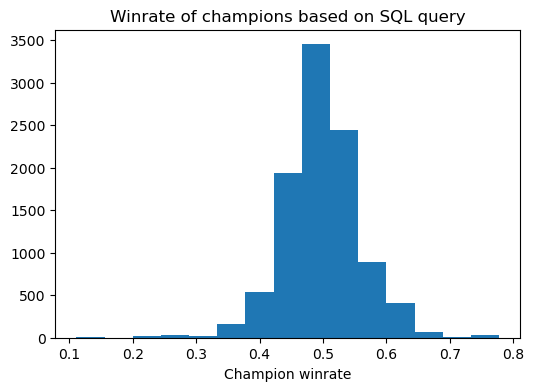

In [58]:
fig, ax = plt.subplots(figsize = (6,4))
#Creating a histogram plot with 15 bins.
ax.hist(df['champion_winrate'], bins = 15)
#Set labels and title
ax.set_xlabel("Champion winrate")
ax.set_title("Winrate of champions based on SQL query")
plt.show()

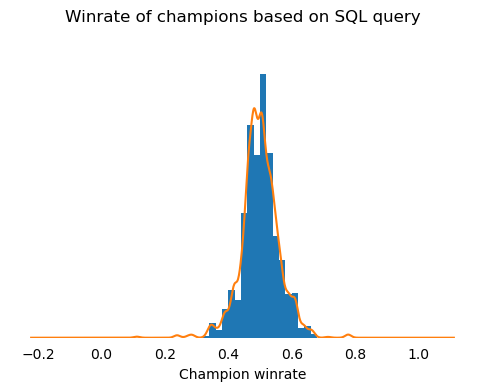

In [59]:
fig, ax = plt.subplots(figsize = (6,4))
winrate = df['champion_winrate']
winrate.plot(kind = "hist", range = (0.3,0.7), density = True, bins = 20)
winrate.plot(kind = "kde")
ax.set_xlabel("Champion winrate")
ax.set_ylim(0,11)
ax.set_title("Winrate of champions based on SQL query")
ax.set_yticks([])
ax.set_ylabel("")
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

plt.show()

A histogram is created to display the distribution of a all the champions win rate by dividing the data into intervals or "bins" and counting the number of observations that fall within each bin.

From the histogram line, we can see the majority of champions win rate is centered around 0.5. As the champion win rate increases or descreases, there are fewer champions in that bin. The bins with the lowest amount of champions have the greatest difference from the expected win rate of 0.5. This shows that the champion win rate is mostly normal.


### Adding purchase rate to items

Unlike champions, items are not restricted to being bought once or being used by only one team.
Allowing for purchase rate to be over 1 as they can be bought many times with no restrictions. There is also no expected win rate. Any item can in in 6 different item slots. A person can by any item and any combination except for a muitple mythic items.

In [60]:
#Creates count for every item in item.csv and sets to 0
df_item['count'] = 0
#converts items df to numpy
items = df_item[['item_name','count']].to_numpy()
#Selects all columns an item appears in
item_bought = df[['item0_name','item1_name','item2_name','item3_name','item4_name','item5_name','item6_name']].to_numpy()
#iterates through length of all item_bought bought by a participant
for i in range(len(item_bought[0])):
    #iterates through length of all item_bought to get every participates purchased items
    for j in range(len(item_bought)):
        #gets item name that a participant bought
        item = item_bought[j][i]
        if item != "No item":
            #finds the index in items array that a participant bought
            item_index = np.where(items == item)
            #Adds 1 to counter 
            items[(item_index[0][0])][1] += 1
df_item_count = pd.DataFrame(items, columns = ['item_name','amount_bought']) 
amount_matches = len(df['match_id'].unique())
df_item_count['purchase_rate'] = df_item_count['amount_bought']/amount_matches
df_item_count.sort_values('purchase_rate',ascending = False)

,item_name,amount_bought,purchase_rate
160,Oracle Lens,3933,3.933
159,Farsight Alteration,2636,2.636
145,Ionian Boots of Lucidity,2347,2.347
76,Sorcerer's Shoes,1837,1.837
158,Stealth Ward,1745,1.745
...,...,...,...
48,Structure Bounty,0,0.0
15,Hailblade,0,0.0
11,Emberknife,0,0.0
49,Structure Bounty,0,0.0


### Graphing items purchase rate

In [61]:
fig = px.scatter(df_item_count, x="item_name", y="purchase_rate", text="item_name", log_x=False, size_max= 1)
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Purchase rate', title_x=0.5)
fig.show()

There are several reasons why certain items in League of Legends are more popular than others:

Item Synergy: Certain items have better synergy with certain champions and their kits. For example, an item like Trinity Force is highly valued by champions that rely on auto-attacks and have abilities that enhance their basic attacks, such as Jax or Irelia. As such, item popularity also relies on champion popularity. 

Meta Shifts: The League of Legends meta is constantly changing and certain items become more or less popular depending on the current state of the game. When a new patch arrives, some items are either buffed or nerfed resulting in changes in popularity.  For example, in this current patch, many champions fall into a certain role known as attack damage carry. Those types of champions are found in every match. Therefore, items that give attack, attack speed or critical chance such as kraken slayer rate become more popular. 

Efficiency: Some items offer a higher level of efficiency than others, providing a stronger power spike for their gold cost. Items that offer more damage or utility for their gold cost, such as Infinity Edge or Zhonya's Hourglass, are likely to be more popular than items that offer less.

Personal Preference: Different players have different playstyles and preferences, leading them to favor certain items over others. Some players may prefer more defensive items, while others may prioritize damage or utility.

Patch Changes: League of Legends is regularly updated with balance changes, which can make certain items more or less popular depending on how they are affected by these updates.

Overall, item popularity in League of Legends is influenced by a combination of factors, including champion synergy, meta shifts, efficiency, personal preference, and patch changes.

## Correlation Analysis

In League of Legends, destroying the nexus is the ultimate objective of the game and is how a team wins. It is accomplished by destroying the enemy team's nexus located at the heart of their base. The nexus is protected by several turrets and inhibitors, but there are certain conditions under which the nexus becomes invulnerable.  The path to the nexus consist of 3 lanes. In each lane, there are 3 turrets and 1 inhibitor. The final defense of the teams nexus is the 2 nexus turrets. Therefore at least 5 turrets and 1 inhibitor must be destroyed before winning the game. Once the nexus is vulnerable, Focus all of your team's damage on the nexus until it is destroyed.

The second way to win is if the enemy team surrenders. If this case, the only requiremnt is enough team members vote yet during a surrender vote after 15 minutes.

The game involves a complex set of mechanics, strategies, and variables that can impact a player's performance and success. As such, various data points can be correlated in League of Legends. There may be some obvious correlated variables such as tower kills with tower damage as it is neccesary to kill a tower by doing enough tower damage. However, there may be other independent variables affecting each other such as the amount of deaths relating to amount of towers destroyed due to having less map pressure once a player is dead. A correlation heat map is utilized to determine any possible correlation. Ids are removed from the dataframe as they do not represent any quantative data.

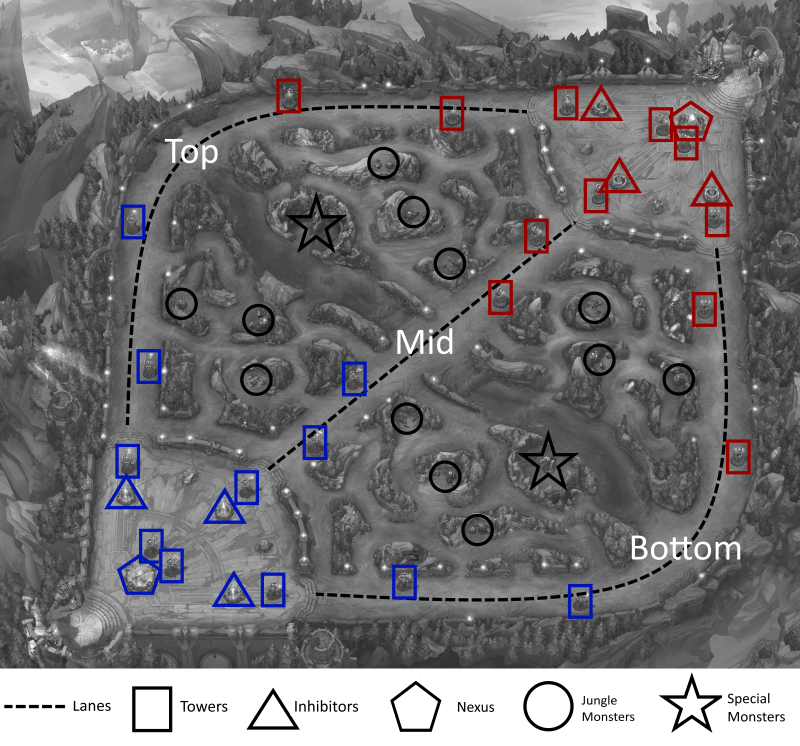

In [62]:
Image(filename = "lol.jpg", width = 500,height=500)

The game involves a complex set of mechanics, strategies, and variables that can impact a player's performance and success. As such, various data points can be correlated in League of Legends. There may be some obvious correlated variables such as tower kills with tower damage as it is neccesary to kill a tower by doing enough tower damage. However, there may be other independent variables affecting each other such as the amount of deaths relating to amount of towers destroyed due to having less map pressure once a player is dead. A correlation heat map is utilized to determine any possible correlation. Ids are removed from the dataframe as they do not represent any quantative data.


In [63]:
df_map = df[['assist','champion_level','dmg_to_turrets','deaths','first_blood','first_tower','gold_spend','kills','sumoner_level','total_damage','total_damage_taken','minions_killed','turret_kills','win','champion_winrate','champion_playrate']]

### Correlation Heatmap

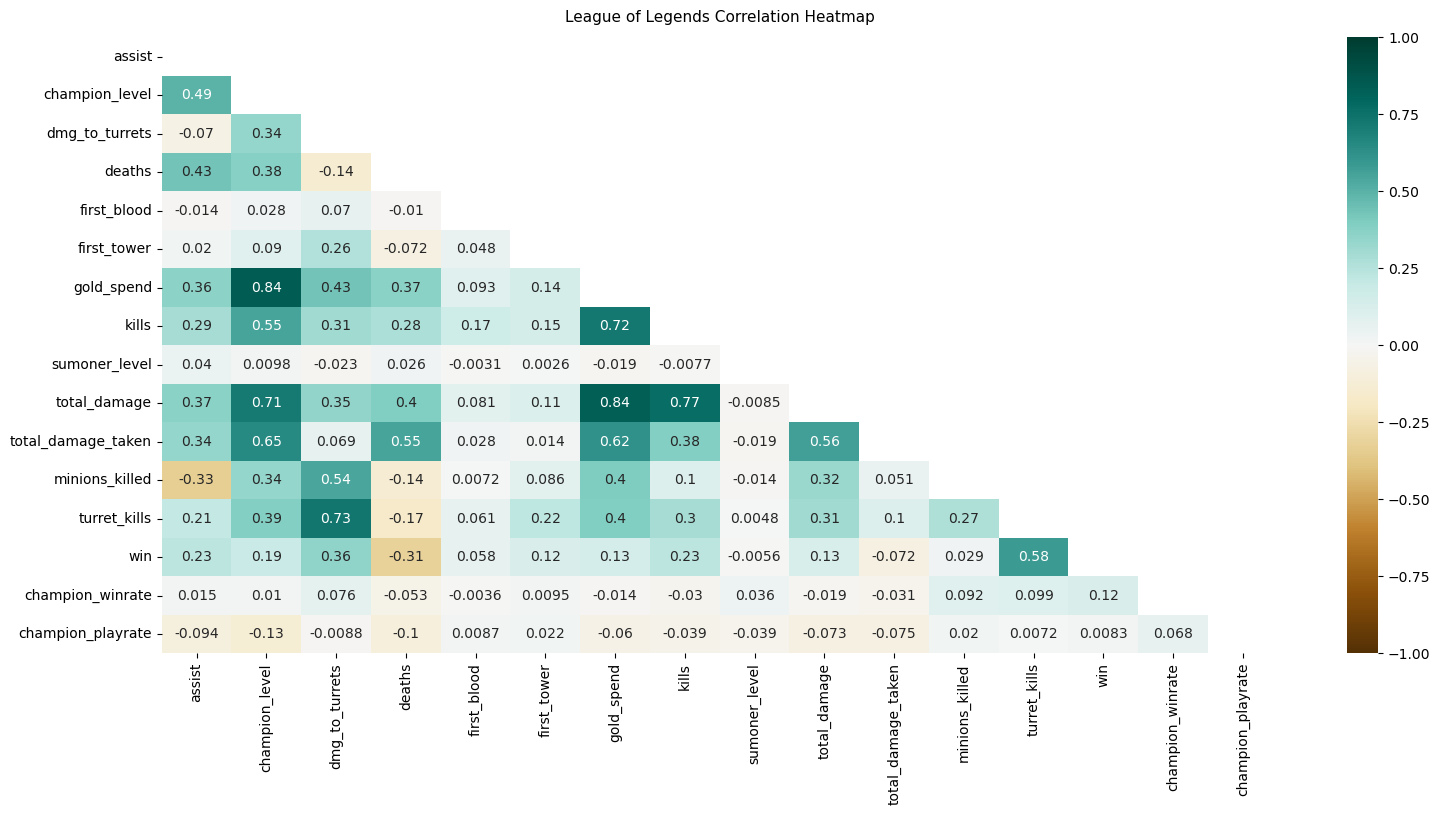

In [64]:
plt.figure(figsize = (18,8))
triangle_mask = np.triu(np.ones_like(df_map.corr(), dtype=bool))
heatmap = sns.heatmap(df_map.corr(),mask=triangle_mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('League of Legends Correlation Heatmap',fontdict={'fontsize':11},pad=11);

As shown in the heat map, there are several correlated variables with varied amounts of correlation. Here are the correlated variables and some possible reasons:

Gold spent with champion_level (0.84): Although there are different ways to earn exp and gold, often times activities such as kills and minions killed give both experience points and gold. There are a few ways to only earn one or the other such as destroying towers which give gold and being around a minion kill without dealing the finishing blow.

kills with champion level (0.55): Total stats can be used as a signal of the games length. As the game continues, there are high chances of more kills, deaths, and objective destroyed happening. In turn, increasing the amount of data.Champion level can me used as a measure how long a game last for. As such, as the champion level increases, so do the amount of total stats. This connection can be used for champion levels with kills, total damage and total damage taken.

minion killed with damage to turrets(0.54) These variables have a semi high correlation with no clear connection. A possible reason is that more minions killed allows a player to push to a tower and deal damage to a tower safely.

turret kills with damage to turrets(0.73) This connection is cause and effect as dealing damage to turrets results in a tower kill.

total damage taken with deaths(0.55) This connection is clear as taking in more damage will result in a players hp being 0 and dying.

kills with gold spent(0.72): Killing an enemy champion rewards 300 gold to a player rather than 15-20 gold per minion. It is the most effective way of gathering gold

total damage and damage taken with gold spent (0.84,0.62): Gold spent is mainly used for purchasing items that allow for a player to deal more damage or items that allow for more damage to be taken. Items can give offensive stats such as more attack damage or ability power which then can be used for killing. There are also defensive items that can increase for health points, allowing for a champion to take more damage without dying.

Kills with damage(0.77): Killing an enemy champion requires a player to deal damage

total damage with total damage taken(0.56): Players will fight other players or objectives that can deal damage back.

turret kills with win(0.58): In order to win, turrets must be destroyed

There are no large negative correlations


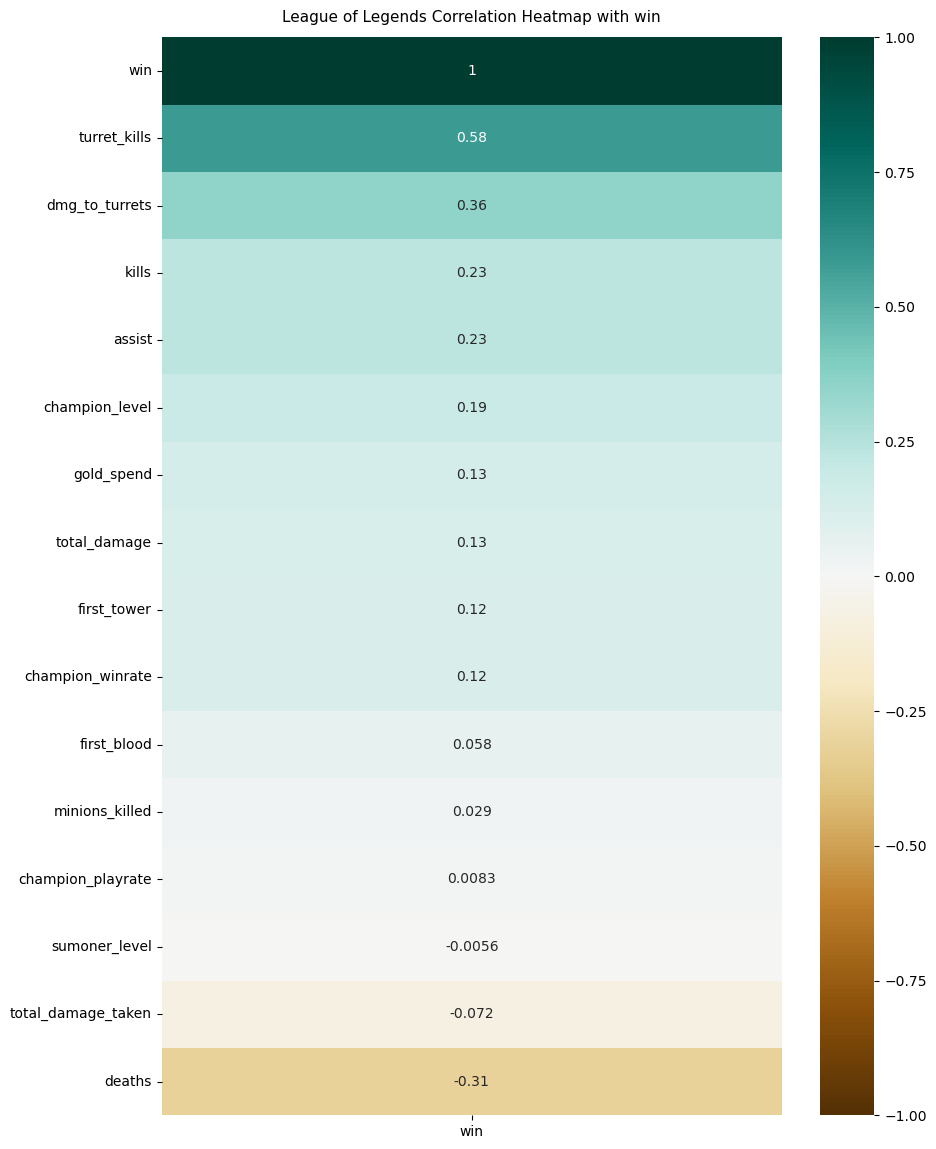

In [65]:
df_map.corr()[['win']].sort_values(by='win', ascending=False)
plt.figure(figsize=(10, 14))
heatmap = sns.heatmap(df_map.corr()[['win']].sort_values(by='win', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('League of Legends Correlation Heatmap with win',fontdict={'fontsize':11},pad=11);

In [66]:
df_teams = df.groupby(['match_id','side']).sum()
df_teams = df_teams[['assist','champion_level','dmg_to_turrets','deaths','first_blood','first_tower','gold_spend','kills','sumoner_level','total_damage','total_damage_taken','minions_killed','turret_kills','win','champion_winrate','champion_playrate']]
df_teams['win'] = df_teams['win']/5
df_teams

assist  champion_level  dmg_to_turrets  deaths  \
match_id       side                                                   
NA1_4550653187 blue      55              78           24555      26   
               red       32              73            7455      43   
NA1_4550677468 blue      17              67            5127      33   
               red       50              75           17896      19   
NA1_4559098466 blue      53              83           21766      26   
...                     ...             ...             ...     ...   
NA1_4595674625 red       75              73           16414      19   
NA1_4595691967 blue       7              49             741      24   
               red       37              51            6899       5   
NA1_4595695911 blue      41              73           10356      52   
               red       79              85           28420      38   

                     first_blood  first_tower  gold_spend  kills  \
match_id       side                                                
NA1_4550653187 blue            1            1       59085     43   
               red             0            0       49800     25   
NA1_4550677468 blue            1            0       44850     19   
               red             0            1       52885     33   
NA1_4559098466 blue            1            1       64720     35   
...                          ...          ...         ...    ...   
NA1_4595674625 red             1            0       53545     37   
NA1_4595691967 blue            0            0       23700      5   
               red             1            0       33335     24   
NA1_4595695911 blue            0            1       61130     37   
               red             1            0       71255     52   

                     sumoner_level  total_damage  total_damage_taken  \
match_id       side                                                    
NA1_4550653187 blue           1782        117138              134761   
               red            1219         90380              141152   
NA1_4550677468 blue            825         65264              121767   
               red            2023        101482              101792   
NA1_4559098466 blue           1109        121869              178106   
...                            ...           ...                 ...   
NA1_4595674625 red            2007        113492              128144   
NA1_4595691967 blue           1976         27150               56624   
               red            1202         40711               48549   
NA1_4595695911 blue           2255        104195              175585   
               red            1775        145076              133107   

                     minions_killed  turret_kills  win  champion_winrate  \
match_id       side                                                        
NA1_4550653187 blue             624            25  1.0          2.409558   
               red              645             2  0.0          2.199797   
NA1_4550677468 blue             579             1  0.0          2.404402   
               red              562            15  1.0          2.574865   
NA1_4559098466 blue             701            21  1.0          2.477681   
...                             ...           ...  ...               ...   
NA1_4595674625 red              612            12  1.0          2.681849   
NA1_4595691967 blue             384             0  0.0          2.620360   
               red              389             2  1.0          2.335740   
NA1_4595695911 blue             649             7  0.0          2.568477   
               red              722            22  1.0          2.797396   

                     champion_playrate  
match_id       side                     
NA1_4550653187 blue              0.298  
               red               0.274  
NA1_4550677468 blue              0.376  
               red               0.370  
NA1_4559098466 blue              0.384  

In [67]:
df.groupby(['match_id','side'])['champion_name'].apply(list)

match_id        side
NA1_4550653187  blue           [Fiora, Elise, Orianna, Vayne, Swain]
                red         [Irelia, Udyr, Kassadin, Samira, Xerath]
NA1_4550677468  blue       [Darius, Sylas, Kassadin, Ezreal, Xerath]
                red             [Olaf, Maokai, Viktor, Twitch, Lulu]
NA1_4559098466  blue               [Ryze, Zac, Sylas, Yasuo, Xerath]
                                            ...                     
NA1_4595674625  red                  [Akali, Zac, Zed, Zeri, Soraka]
NA1_4595691967  blue           [Aatrox, Viego, Kennen, Veigar, Sona]
                red            [Sivir, Ekko, Talon, Malphite, Leona]
NA1_4595695911  blue    [Tryndamere, Viego, Sylas, Aphelios, Thresh]
                red        [Jax, Nocturne, AurelionSol, Kaisa, Pyke]
Name: champion_name, Length: 2000, dtype: object

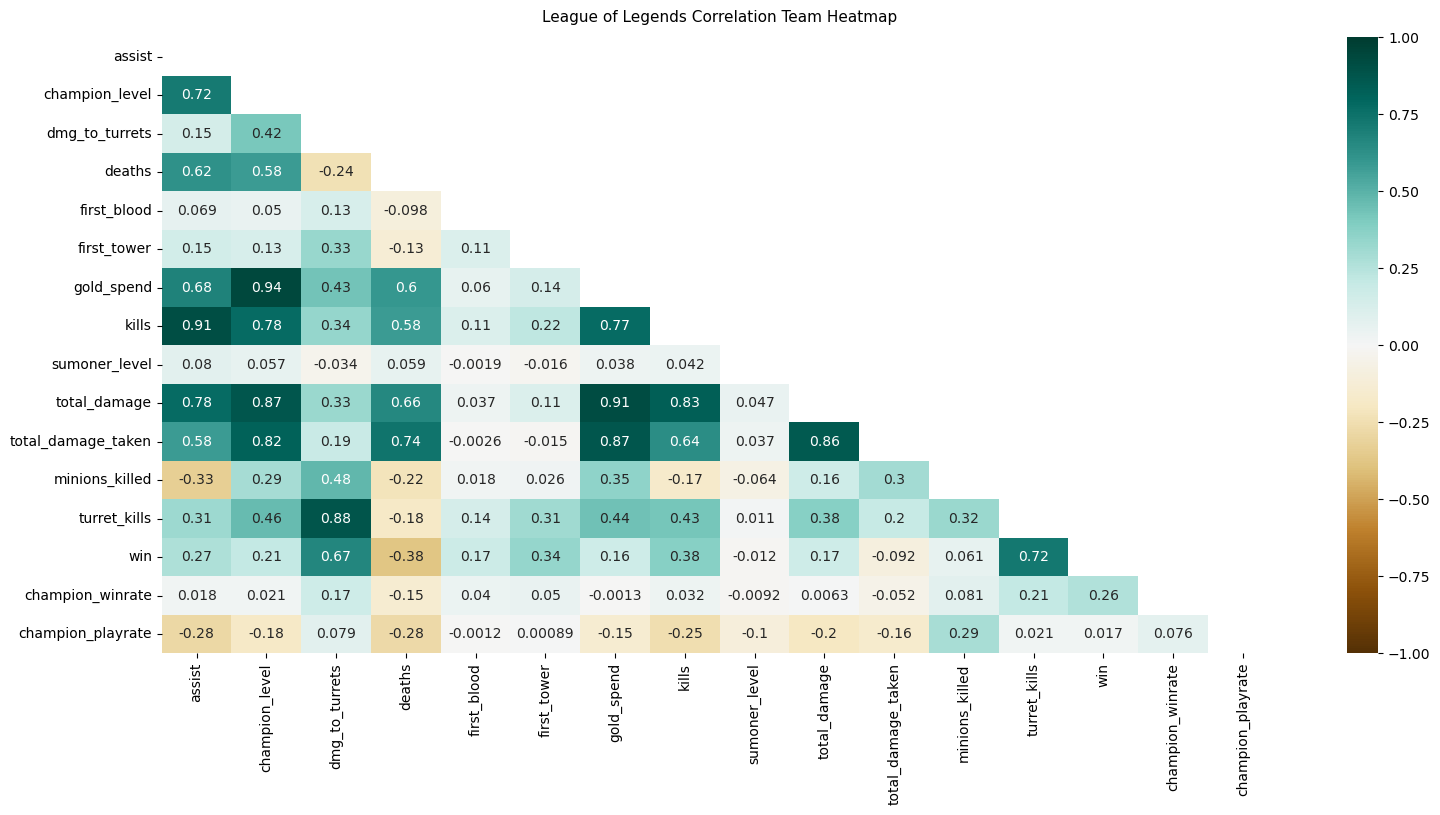

In [68]:
plt.figure(figsize = (18,8))
triangle_mask = np.triu(np.ones_like(df_teams.corr(), dtype=bool))
heatmap = sns.heatmap(df_teams.corr(),mask=triangle_mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('League of Legends Correlation Team Heatmap',fontdict={'fontsize':11},pad=11);

In the team heatmap, it is shown there are slighty higher correlation levels than the individual level.
As league of legends is a team game, it is important to work together as a whole in order to achieve victory. If one player performs well while the other does not, it can create varied data. In contrast, the final team data is a good representation of how a match went overall.

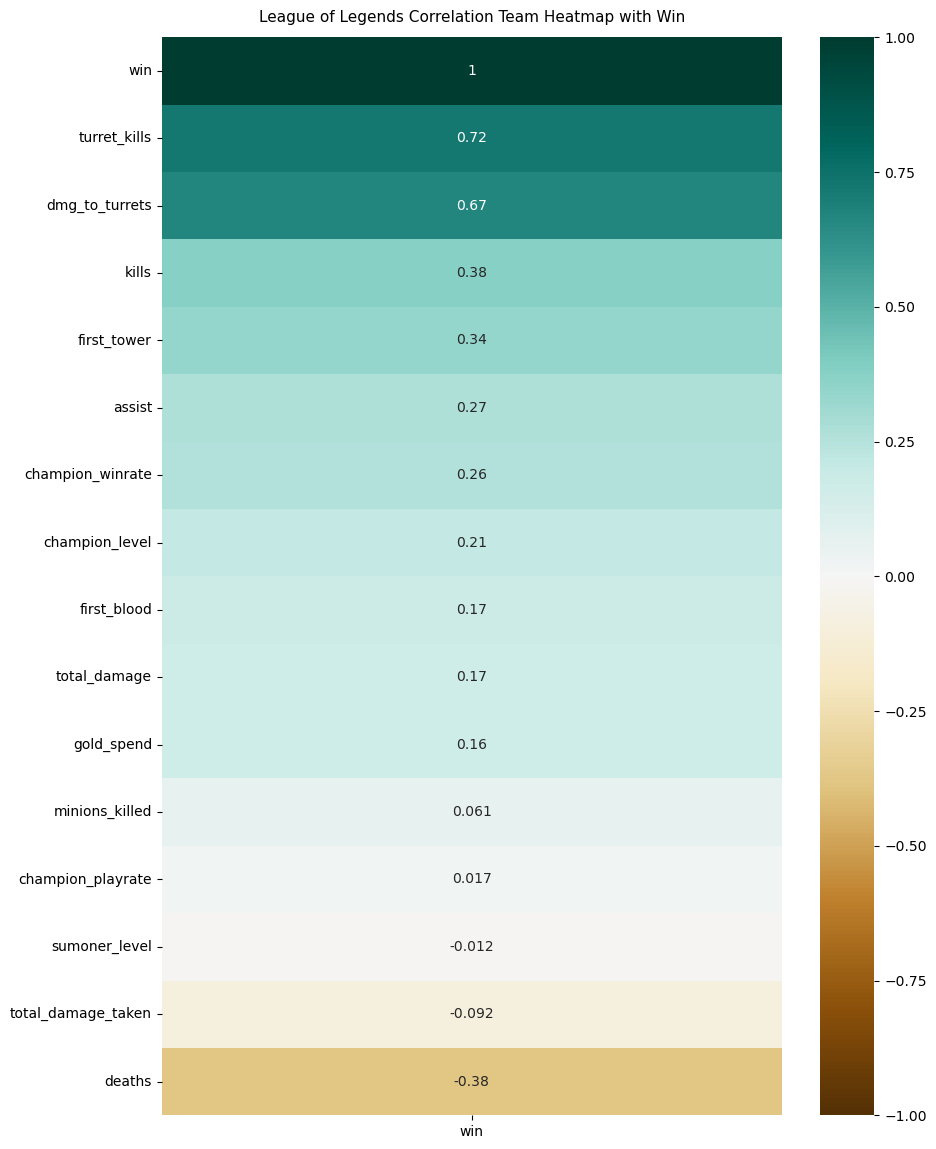

In [69]:
df_teams.corr()[['win']].sort_values(by='win', ascending=False)
plt.figure(figsize=(10, 14))
heatmap = sns.heatmap(df_teams.corr()[['win']].sort_values(by='win', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('League of Legends Correlation Team Heatmap with Win',fontdict={'fontsize':11},pad=11);

### Variables that influence wins

As shown above, the most important data for winning a game is towers destroyed for the reasons explained above.
The highest negative correlation for not winning is the amount of deaths. Although it is only at -0.31, the amount of deaths typically represent how much behined a player is then the enemy. If a person has a high death count, it means they were killed by the enemy more. Leading to higher gold spent and tower kills.